## Visualization

This contains just a quick visualization of my results

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
data_og = pd.read_csv('combined_data.csv')
data = data_og.grade
data

0                                              Happiness.
1                                                Sadness.
2                                                Sadness.
3                                                  Anger.
4                                                Disgust.
                              ...                        
3636                                              Disgust
3637                                                 Love
3638    Passion. (This word encompasses all of the lis...
3639                                              Sadness
3640                              Empowerment - happiness
Name: grade, Length: 3641, dtype: object

In [10]:
emots_list = ['sadness', 'happiness', 'fear', 'anger', 'surprise', 'disgust']

We again have to clean the output of gpt, because sometimes we got more than one emotions, which is not what we want for our "grade" field.

In [20]:
teset_dict = {key:0 for i, key in enumerate(emots_list)}
max(teset_dict, key=teset_dict.get)

'sadness'

In [ ]:
for idx, row in data.iteritems():
    count_of_emots = {key:0 for key in emots_list}
    for emot in emots_list:
        count_of_emots[emot] = row.lower().count(emot)
    highest_emot = max(count_of_emots, key=count_of_emots.get)
    data.iloc[idx] = highest_emot
    if len(row) > 20:
        print(row.lower())
        print('----------')
        print(data.iloc[idx])
        print('----------')
    #if idx==20: break

In [ ]:
for key, ele in data.items():
    print(key, ele)

In [87]:
print(data.value_counts())
dict(data.value_counts())

sadness      1310
happiness     787
anger         722
disgust       662
fear           93
surprise       67
Name: grade, dtype: int64


{'sadness': 1310,
 'happiness': 787,
 'anger': 722,
 'disgust': 662,
 'fear': 93,
 'surprise': 67}

In [88]:
data_og.grade = data

In [89]:
data_og.to_csv('final_raps_de.csv', index=False)

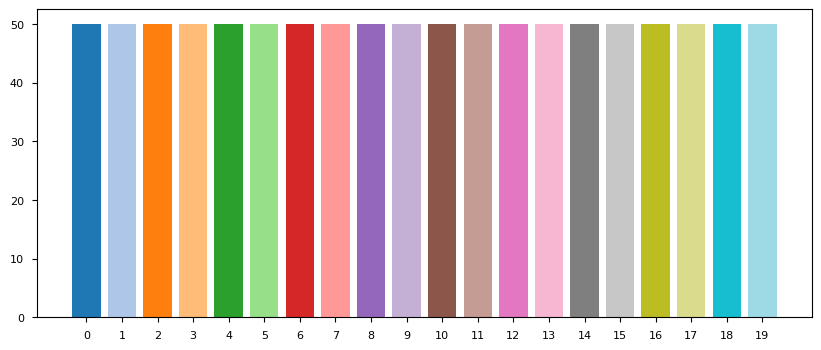

In [80]:
# choosing a colorpalette...

colormap = plt.cm.tab20(np.linspace(0, 1, 20))
#colormap = plt.cm.Set1(np.linspace(0, 1, 20))
colors = [colormap[i] for i in range(20)]#(, colormap[6], colormap[8], colormap[12], colormap[14], colormap[16]]
fig, ax = plt.subplots(figsize = (10,4))
ax.bar([i for i in range(20)], [50 for i in range(20)], color=colors)
ax.set_xticks([i for i in range(20)])
plt.show()

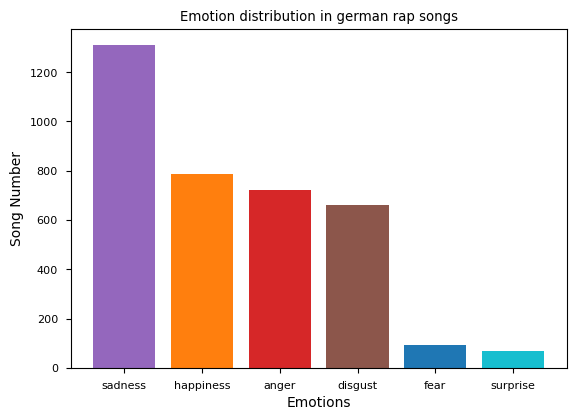

In [92]:
# Define bar colors
# colors are wrong right now
#plt.style.use('tableau-colorblind10')
fin_colors = [colors[9],colors[3], colors[7], colors[11], colors[1], colors[19]]
fin_colors = [colors[8],colors[2], colors[6], colors[10], colors[0], colors[18]]

# Create barplot
plt.bar(dict(data.value_counts()).keys(), dict(data.value_counts()).values(), color=fin_colors)

# Add labels and title
plt.xlabel('Emotions')
plt.ylabel('Song Number')
plt.title('Emotion distribution in german rap songs')

# Show plot
plt.show()


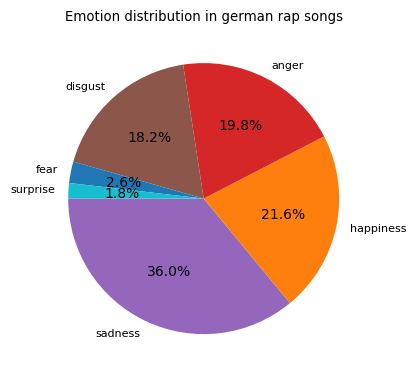

In [94]:
labels = dict(data.value_counts()).keys()
sizes = dict(data.value_counts()).values()

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, colors=fin_colors, labeldistance=1.1)

# Set the plot title
plt.title('Emotion distribution in german rap songs')

# Show the plot
plt.show()